# Passos previs

## Importar

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import locale
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import re
%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)

Es carrega el fitxer guardat en el preprocessament

In [2]:
mainpath = "C:/Users/miquel.vallverdu/Desktop/Miquel/TFG/Repos/Bismart-P19824-PrediccionOcupacionHoteles_TFG_MVallverdu/dataset/"
#mainpath = "C:/Users/Miquel/Desktop/Miquel/Estudis/ESTADISTICA/TFG/"

df1 = pd.read_csv(mainpath + "dfFinal.csv", sep = ",")
dates = pd.read_csv(mainpath + "dates.csv", sep = ";")
df1.diaAño = df1.diaAño.asobject

C:\Users\miquel.vallverdu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  


In [3]:
sum(df1.duplicated())

0

## Llistes segons variable

In [4]:
objs = df1.describe(include = 'object').columns.tolist()
ints = df1.describe(include = 'int64').columns.tolist()
flts = df1.describe(include = 'float64').columns.tolist()

## Funcions

In [5]:
def habitacionsPerCategoria(categoria, df):
    cat = []
    habCat = []
    pHabCat = []
    for c in categoria.unique():
        cat.append(c) ## llista amb els valors unics de la categoria
        habCat.append(sum(df[categoria==c]['NHab'])) ## suma d'habitacions
        pHabCat.append(round(sum(df[categoria==c]['NHab'])*100/sum(df['NHab']),3)) ## percentatges
    return pd.DataFrame(list(zip(cat, habCat, pHabCat)), columns = ['id', 'Total habitacions', 'Percentatge %'])


def filtroMenorQue5(lista):
    if(lista < 5):
        return True
    else:
        return False
    
    
def llistaHotel(hotel, df):
    l = list(df[df['idhotel']==hotel]['NHab'])
    return l

# Anàlisi descriptiu

## Variable objectiu

In [6]:
df100 = df1[df1['NHab']<100]
df50 = df1[df1['NHab']<50]
df20 = df1[df1['NHab']<20]
df10 = df1[df1['NHab']<10]

Es creen conjunts de dades reduint el valor màxim que pren *NHab*. Per tal de veure si les variables es comporten de diferent manera.

#### Histogrames

Text(0.5, 1.0, "Número d'habitacions ocupades (menys de 50)")

Text(0.5, 0, 'Habitacions')

Text(0, 0.5, 'Recompte')

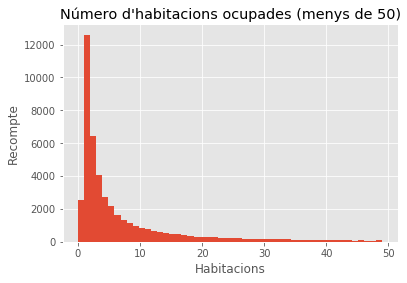

In [7]:
plt.title("Número d'habitacions ocupades (menys de 50)")
plt.xlabel('Habitacions')
plt.ylabel('Recompte')
plt.show(plt.hist(df50['NHab'], bins = 50))

#df1[df1['NHab']<40]['NHab']

Es veu clarament com la majoria de casos es concentren clarament en valors petits, en més de 35000 casos es reserva una sola habitació.

#### Distribució

Text(0.5, 1.0, "Distribució Número d'habitacions (menys de 50)")

Text(0.5, 0, "Número d'habitacions")

Text(0, 0.5, 'Densitat')

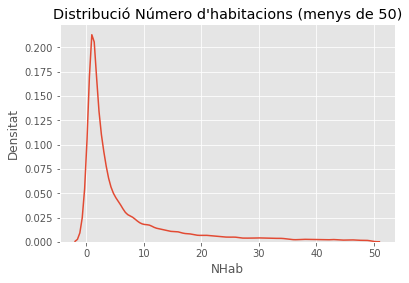

In [8]:
plt.title("Distribució Número d'habitacions (menys de 50)")
plt.xlabel("Número d'habitacions")
plt.ylabel("Densitat")
plt.show(sns.distplot(df50['NHab'], hist = False))


#### Boxplots

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 100)")

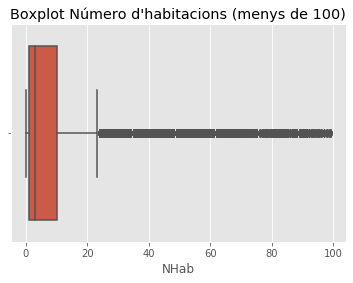

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 50)")

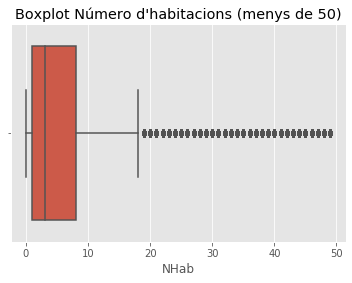

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 20)")

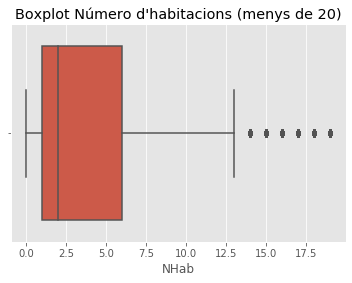

Text(0.5, 1.0, "Boxplot Número d'habitacions (menys de 10)")

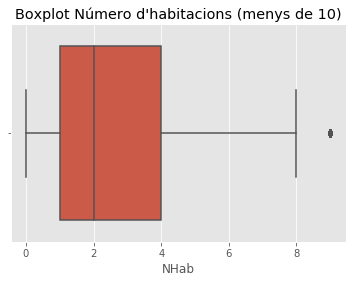

In [9]:
plt.title("Boxplot Número d'habitacions (menys de 100)")
plt.show(sns.boxplot(x = df100['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 50)")
plt.show(sns.boxplot(x = df50['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 20)")
plt.show(sns.boxplot(x = df20['NHab']))

plt.title("Boxplot Número d'habitacions (menys de 10)")
plt.show(sns.boxplot(x = df10['NHab']))

In [10]:
df100['NHab'].describe()
df50['NHab'].describe()
df20['NHab'].describe()
df10['NHab'].describe()

count    47484.000000
mean         9.289045
std         15.425153
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max         99.000000
Name: NHab, dtype: float64

count    45590.000000
mean         6.834986
std          9.436435
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         49.000000
Name: NHab, dtype: float64

count    40989.000000
mean         4.139330
std          4.390346
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         19.000000
Name: NHab, dtype: float64

count    35604.000000
mean         2.699978
std          2.287862
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          9.000000
Name: NHab, dtype: float64

## Variables categòriques

### Hotel

#### Anàlisi univariat

Text(0.5, 1.0, 'ID hotel')

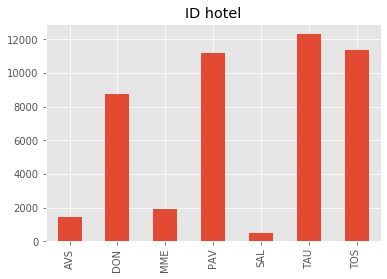

Text(0.5, 1.0, 'ID hotel')

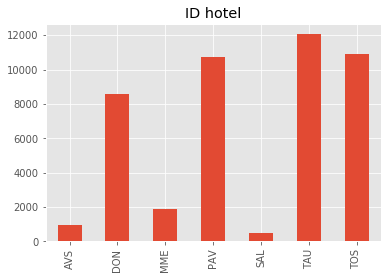

Text(0.5, 1.0, 'ID hotel')

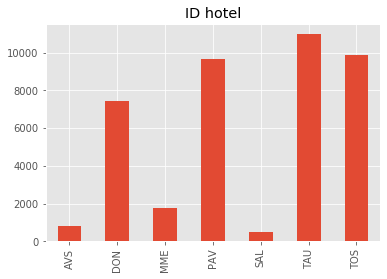

Text(0.5, 1.0, 'ID hotel')

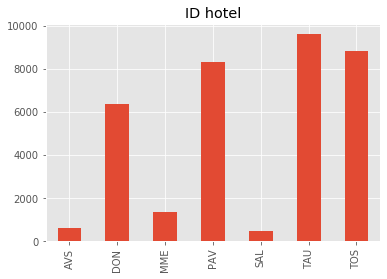

In [11]:
plt.title('ID hotel')
plt.show(df100['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df50['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df20['idhotel'].value_counts().sort_index().plot.bar())

plt.title('ID hotel')
plt.show(df10['idhotel'].value_counts().sort_index().plot.bar())

In [12]:
h100 = pd.concat([df100['idhotel'].value_counts().sort_index()/len(df100)*100, 
                df100['idhotel'].value_counts().sort_index()], axis = 1)
h100.columns = ['%', 'Recompte']
h100.sort_values(by=['Recompte'], ascending = False)

h50 = pd.concat([df50['idhotel'].value_counts().sort_index()/len(df50)*100, 
                df50['idhotel'].value_counts().sort_index()], axis = 1)
h50.columns = ['%', 'Recompte']
h50.sort_values(by=['Recompte'], ascending = False)

h20 = pd.concat([df20['idhotel'].value_counts().sort_index()/len(df20)*100, 
                df20['idhotel'].value_counts().sort_index()], axis = 1)
h20.columns = ['%', 'Recompte']
h20.sort_values(by=['Recompte'], ascending = False)

h10 = pd.concat([df10['idhotel'].value_counts().sort_index()/len(df10)*100, 
                df10['idhotel'].value_counts().sort_index()], axis = 1)
h10.columns = ['%', 'Recompte']
h10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
TAU,25.930840,12313
TOS,23.978603,11386
PAV,23.603740,11208
DON,18.410412,8742
MME,3.984500,1892
AVS,3.028389,1438
SAL,1.063516,505


,%,Recompte
TAU,26.440009,12054
TOS,23.915332,10903
PAV,23.481027,10705
DON,18.797982,8570
MME,4.150033,1892
AVS,2.107918,961
SAL,1.107699,505


,%,Recompte
TAU,26.790114,10981
TOS,24.045476,9856
PAV,23.528264,9644
DON,18.160970,7444
MME,4.315792,1769
AVS,1.959062,803
SAL,1.200322,492


,%,Recompte
TAU,26.988541,9609
TOS,24.778115,8822
PAV,23.424334,8340
DON,17.927761,6383
MME,3.833839,1365
AVS,1.755421,625
SAL,1.291990,460



#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

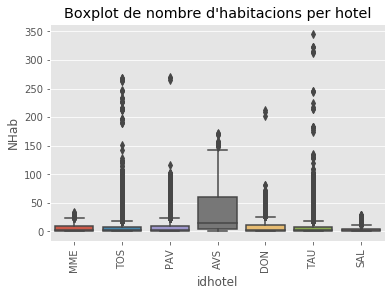

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel (menys de 100)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

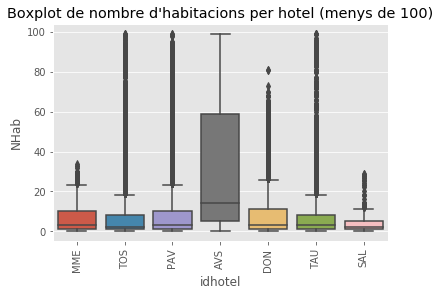

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel (menys de 50)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

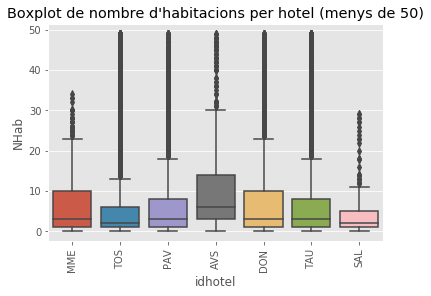

Text(0.5, 1.0, "Boxplot de nombre d'habitacions per hotel (menys de 20)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Hotel')

Text(0, 0.5, 'Nº Habitacions')

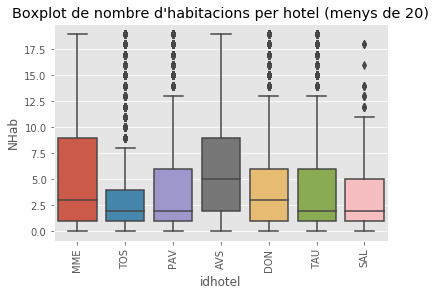

In [13]:
plt.title("Boxplot de nombre d'habitacions per hotel")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df1))

plt.title("Boxplot de nombre d'habitacions per hotel (menys de 100)")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df100))

plt.title("Boxplot de nombre d'habitacions per hotel (menys de 50)")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df50))

plt.title("Boxplot de nombre d'habitacions per hotel (menys de 20)")
plt.xticks(rotation = 90)
plt.xlabel("Hotel")
plt.ylabel("Nº Habitacions")
plt.show(sns.boxplot(x="idhotel", y="NHab", data=df20))




### Client

#### Anàlisi univariat

Text(0.5, 1.0, 'ID client')

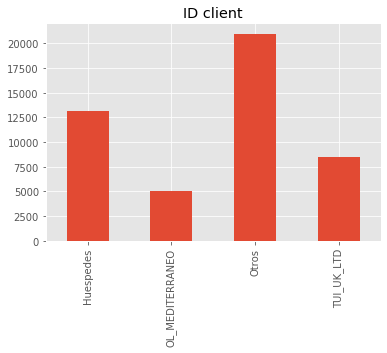

Text(0.5, 1.0, 'ID client')

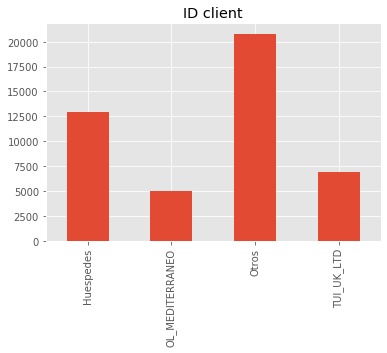

Text(0.5, 1.0, 'ID client')

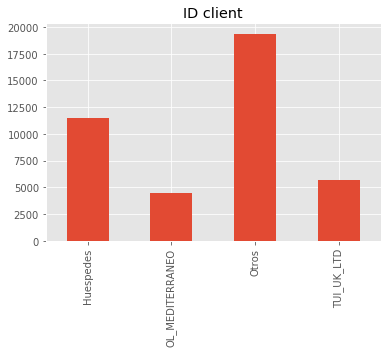

Text(0.5, 1.0, 'ID client')

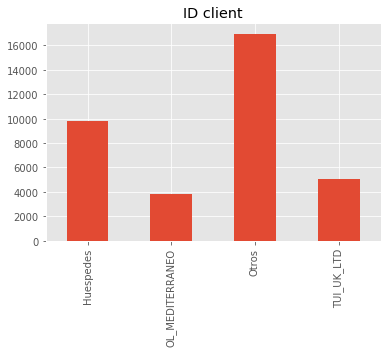

In [14]:
plt.title('ID client')
plt.show(df100['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df50['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df20['idcliente'].value_counts().sort_index().plot.bar())

plt.title('ID client')
plt.show(df10['idcliente'].value_counts().sort_index().plot.bar())

In [15]:
cl100 = pd.concat([df100['idcliente'].value_counts().sort_index()/len(df100)*100, 
                df100['idcliente'].value_counts().sort_index()], axis = 1)
cl100.columns = ['%', 'Recompte']
cl100.sort_values(by=['Recompte'], ascending = False)

cl50 = pd.concat([df50['idcliente'].value_counts().sort_index()/len(df50)*100, 
                df50['idcliente'].value_counts().sort_index()], axis = 1)
cl50.columns = ['%', 'Recompte']
cl50.sort_values(by=['Recompte'], ascending = False)

cl20 = pd.concat([df20['idcliente'].value_counts().sort_index()/len(df20)*100, 
                df20['idcliente'].value_counts().sort_index()], axis = 1)
cl20.columns = ['%', 'Recompte']
cl20.sort_values(by=['Recompte'], ascending = False)

cl10 = pd.concat([df10['idcliente'].value_counts().sort_index()/len(df10)*100, 
                df10['idcliente'].value_counts().sort_index()], axis = 1)
cl10.columns = ['%', 'Recompte']
cl10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
Otros,44.164350,20971
Huespedes,27.562969,13088
TUI_UK_LTD,17.780726,8443
OL_MEDITERRANEO,10.491955,4982


,%,Recompte
Otros,45.641588,20808
Huespedes,28.293485,12899
TUI_UK_LTD,15.224830,6941
OL_MEDITERRANEO,10.840097,4942


,%,Recompte
Otros,47.278538,19379
Huespedes,28.017273,11484
TUI_UK_LTD,13.779307,5648
OL_MEDITERRANEO,10.924882,4478


,%,Recompte
Otros,47.651949,16966
Huespedes,27.527806,9801
TUI_UK_LTD,14.152904,5039
OL_MEDITERRANEO,10.667341,3798


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 100)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

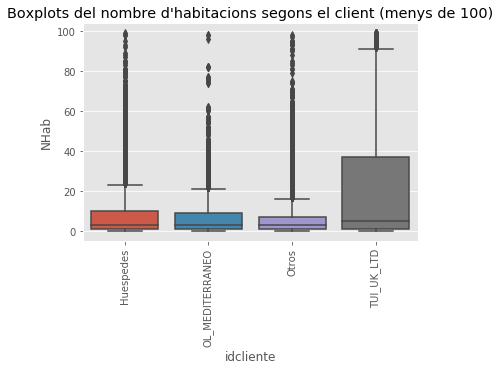

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 50)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

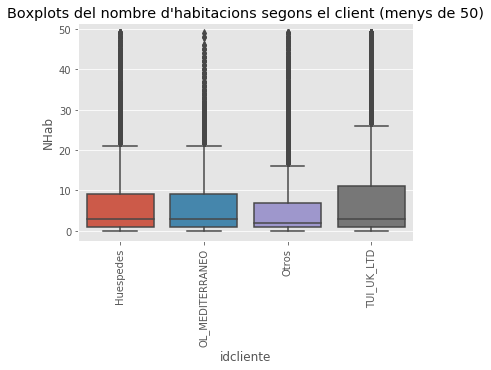

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 20)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

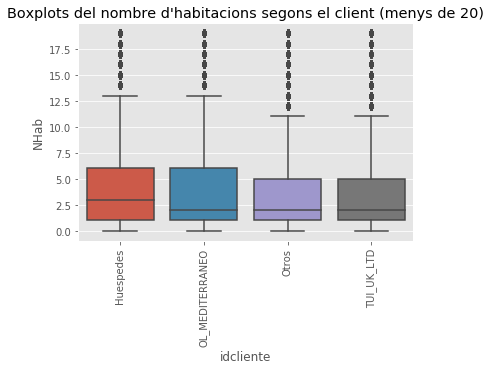

Text(0.5, 1.0, "Boxplots del nombre d'habitacions segons el client (menys de 10)")

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

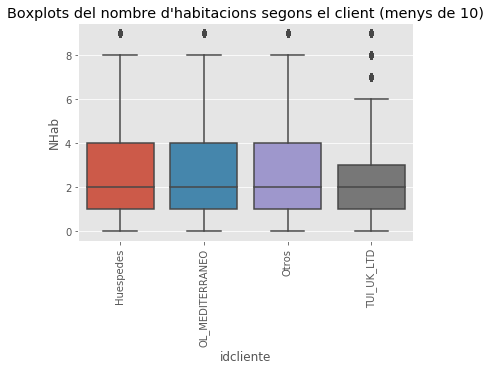

In [16]:
plt.title("Boxplots del nombre d'habitacions segons el client (menys de 100)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df100))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 50)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df50))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 20)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df20))

plt.title("Boxplots del nombre d'habitacions segons el client (menys de 10)")
plt.xticks(rotation = 90)
plt.show(sns.boxplot(x = 'idcliente', y = 'NHab', data = df10))


### Tipus Habitació


#### Anàlisi univariat

In [17]:
df1[df1.idtipohab=='APART']

,idhotel,fechaocupacion,idcliente,idtipohab,idregimen,idsegmento,id_canal,idpais_cliente,NHab,S1H,S2H,S3H,S4H,S5H,S6H,S7H,S8H,S9H,S10H,S11H,S12H,S13H,S14H,S15H,S16H,S17H,S18H,S19H,S20H,S21H,S22H,S23H,S24H,S25H,S26H,S27H,S28H,S29H,S30H,S31H,S32H,S33H,S34H,S35H,S36H,S37H,S38H,S39H,S40H,S41H,S42H,S43H,S44H,S45H,S46H,S47H,S48H,S49H,S50H,S51H,S52H,PreuHab,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51,S52,diaAño
25858,AVS,2019-04-27,Huespedes,APART,MP,DESCONOCIDO,DESCONOCIDO,ES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,97.29091,118


Text(0.5, 1.0, "Tipus d'habitació")

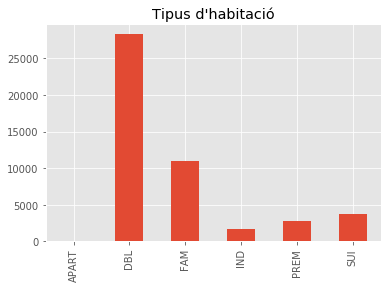

Text(0.5, 1.0, "Tipus d'habitació")

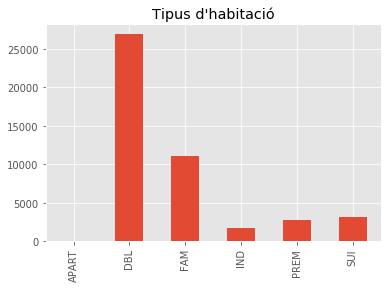

Text(0.5, 1.0, "Tipus d'habitació")

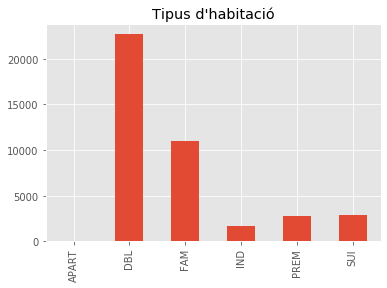

Text(0.5, 1.0, "Tipus d'habitació")

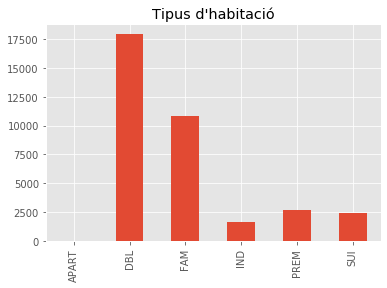

In [18]:
plt.title("Tipus d'habitació")
plt.show(df100['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df50['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df20['idtipohab'].value_counts().sort_index().plot.bar())

plt.title("Tipus d'habitació")
plt.show(df10['idtipohab'].value_counts().sort_index().plot.bar())






In [19]:
hab100 = pd.concat([df100['idtipohab'].value_counts().sort_index()/len(df100)*100, 
                df100['idtipohab'].value_counts().sort_index()], axis = 1)
hab100.columns = ['%', 'Recompte']
hab100.sort_values(by=['Recompte'], ascending = False)

hab50 = pd.concat([df50['idtipohab'].value_counts().sort_index()/len(df50)*100, 
                df50['idtipohab'].value_counts().sort_index()], axis = 1)
hab50.columns = ['%', 'Recompte']
hab50.sort_values(by=['Recompte'], ascending = False)

hab20 = pd.concat([df20['idtipohab'].value_counts().sort_index()/len(df20)*100, 
                df20['idtipohab'].value_counts().sort_index()], axis = 1)
hab20.columns = ['%', 'Recompte']
hab20.sort_values(by=['Recompte'], ascending = False)

hab10 = pd.concat([df10['idtipohab'].value_counts().sort_index()/len(df10)*100, 
                df10['idtipohab'].value_counts().sort_index()], axis = 1)
hab10.columns = ['%', 'Recompte']
hab10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DBL,59.662202,28330
FAM,23.214135,11023
SUI,7.737343,3674
PREM,5.793530,2751
IND,3.590683,1705
APART,0.002106,1


,%,Recompte
DBL,59.032683,26913
FAM,24.178548,11023
SUI,7.012503,3197
PREM,6.034218,2751
IND,3.739855,1705
APART,0.002193,1


,%,Recompte
DBL,55.424626,22718
FAM,26.848667,11005
SUI,6.887214,2823
PREM,6.687160,2741
IND,4.149894,1701
APART,0.002440,1


,%,Recompte
DBL,50.286485,17904
FAM,30.434783,10836
PREM,7.659252,2727
SUI,6.844737,2437
IND,4.771936,1699
APART,0.002809,1


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

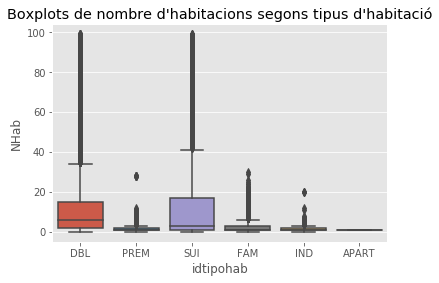

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

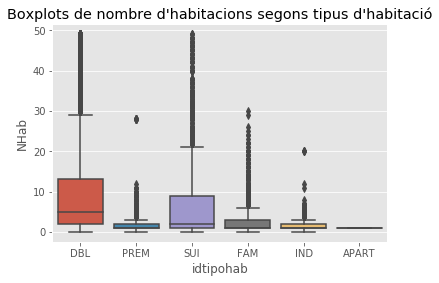

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

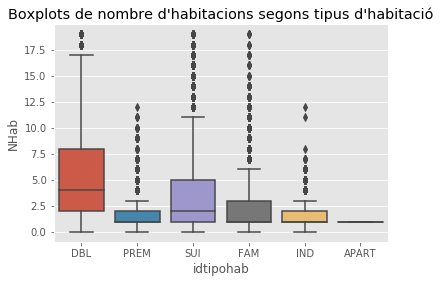

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus d'habitació")

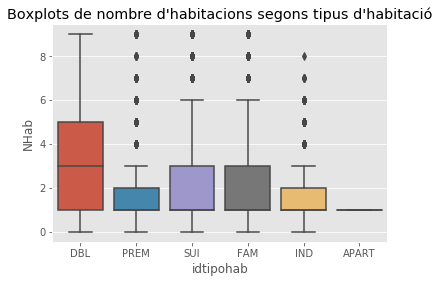

In [20]:
plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons tipus d'habitació")
plt.show(sns.boxplot(x="idtipohab", y="NHab", data=df10))

### Règim

#### Anàlisi univariat

Text(0.5, 1.0, 'Règim')

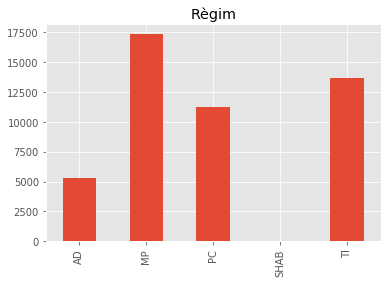

Text(0.5, 1.0, 'Règim')

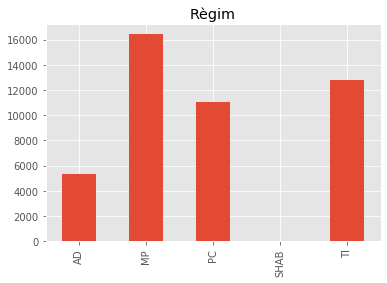

Text(0.5, 1.0, 'Règim')

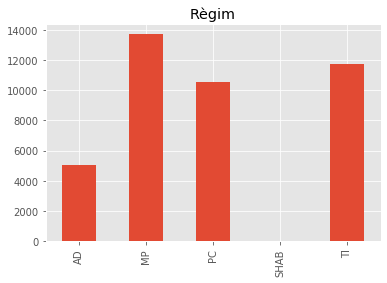

Text(0.5, 1.0, 'Règim')

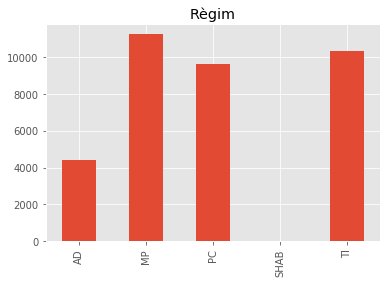

In [21]:
plt.title('Règim')
plt.show(df100['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df50['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df20['idregimen'].value_counts().sort_index().plot.bar())

plt.title('Règim')
plt.show(df10['idregimen'].value_counts().sort_index().plot.bar())



In [22]:
r100 = pd.concat([df100['idregimen'].value_counts().sort_index()/len(df100)*100, 
                df100['idregimen'].value_counts().sort_index()], axis = 1)
r100.columns = ['%', 'Recompte']
r100.sort_values(by=['Recompte'], ascending = False)

r50 = pd.concat([df50['idregimen'].value_counts().sort_index()/len(df50)*100, 
                df50['idregimen'].value_counts().sort_index()], axis = 1)
r50.columns = ['%', 'Recompte']
r50.sort_values(by=['Recompte'], ascending = False)

r20 = pd.concat([df20['idregimen'].value_counts().sort_index()/len(df20)*100, 
                df20['idregimen'].value_counts().sort_index()], axis = 1)
r20.columns = ['%', 'Recompte']
r20.sort_values(by=['Recompte'], ascending = False)

r10 = pd.concat([df10['idregimen'].value_counts().sort_index()/len(df10)*100, 
                df10['idregimen'].value_counts().sort_index()], axis = 1)
r10.columns = ['%', 'Recompte']
r10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
MP,36.471232,17318
TI,28.723359,13639
PC,23.599528,11206
AD,11.184820,5311
SHAB,0.021060,10


,%,Recompte
MP,36.018864,16421
TI,28.030270,12779
PC,24.292608,11075
AD,11.636324,5305
SHAB,0.021935,10


,%,Recompte
MP,33.423601,13700
TI,28.622313,11732
PC,25.687380,10529
AD,12.242309,5018
SHAB,0.024397,10


,%,Recompte
MP,31.532974,11227
TI,29.013594,10330
PC,26.971689,9603
AD,12.453657,4434
SHAB,0.028087,10


#### Anàlisi bivariat 

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

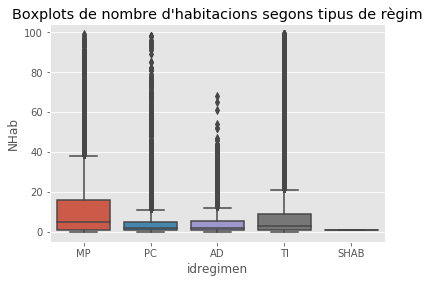

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

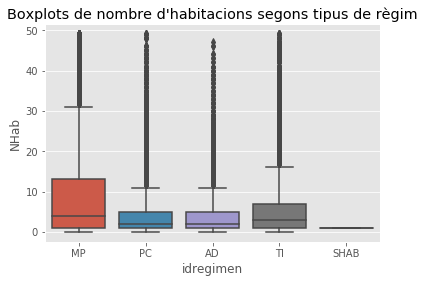

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

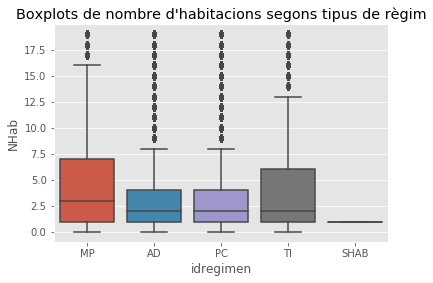

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons tipus de règim")

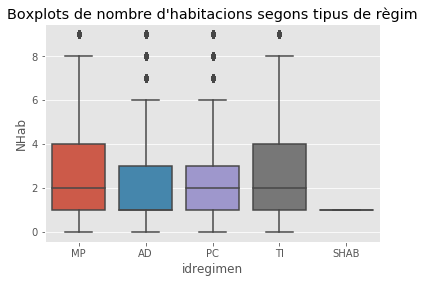

In [23]:
plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons tipus de règim")
plt.show(sns.boxplot(x="idregimen", y="NHab", data=df10))

### Segment

#### Anàlisi univariat

Text(0.5, 1.0, 'Segment')

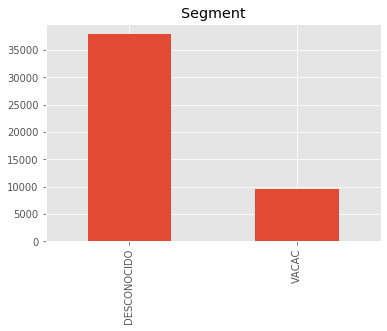

Text(0.5, 1.0, 'Segment')

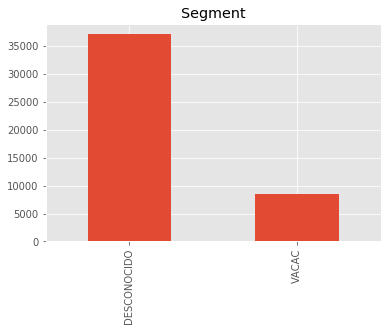

Text(0.5, 1.0, 'Segment')

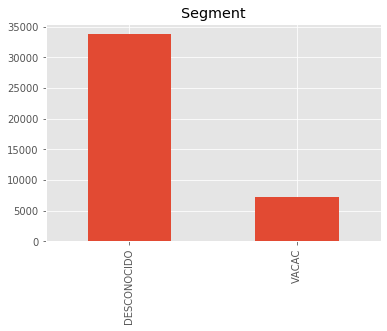

Text(0.5, 1.0, 'Segment')

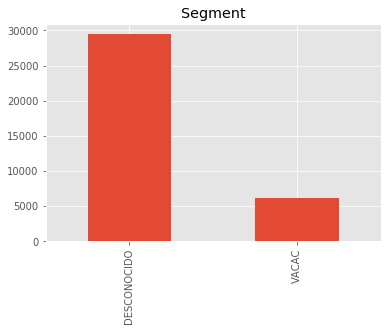

In [24]:
plt.title("Segment")
plt.show(df100['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df50['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df20['idsegmento'].value_counts().sort_index().plot.bar())

plt.title("Segment")
plt.show(df10['idsegmento'].value_counts().sort_index().plot.bar())




In [25]:
s100 = pd.concat([df100['idsegmento'].value_counts().sort_index()/len(df100)*100, 
                df100['idsegmento'].value_counts().sort_index()], axis = 1)
s100.columns = ['%', 'Recompte']
s100.sort_values(by=['Recompte'], ascending = False)

s50 = pd.concat([df50['idsegmento'].value_counts().sort_index()/len(df50)*100, 
                df50['idsegmento'].value_counts().sort_index()], axis = 1)
s50.columns = ['%', 'Recompte']
s50.sort_values(by=['Recompte'], ascending = False)

s20 = pd.concat([df20['idsegmento'].value_counts().sort_index()/len(df20)*100, 
                df20['idsegmento'].value_counts().sort_index()], axis = 1)
s20.columns = ['%', 'Recompte']
s20.sort_values(by=['Recompte'], ascending = False)

s10 = pd.concat([df10['idsegmento'].value_counts().sort_index()/len(df10)*100, 
                df10['idsegmento'].value_counts().sort_index()], axis = 1)
s10.columns = ['%', 'Recompte']
s10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,79.734226,37861
VACAC,20.265774,9623


,%,Recompte
DESCONOCIDO,81.414784,37117
VACAC,18.585216,8473


,%,Recompte
DESCONOCIDO,82.344044,33752
VACAC,17.655956,7237


,%,Recompte
DESCONOCIDO,82.690147,29441
VACAC,17.309853,6163


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

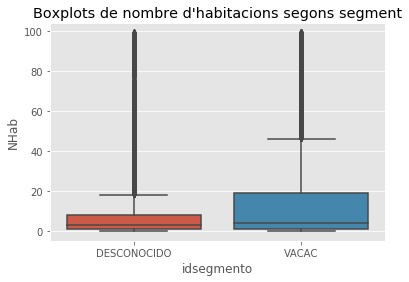

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

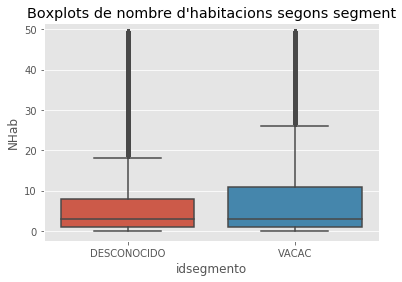

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

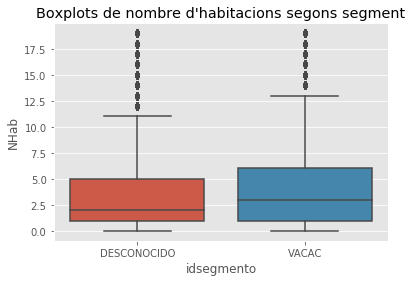

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons segment")

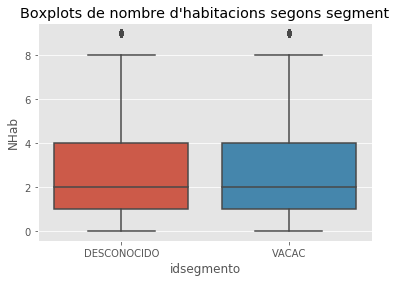

In [26]:
plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons segment")
plt.show(sns.boxplot(x="idsegmento", y="NHab", data=df10))

### Canal

#### Anàlisi univariat

Text(0.5, 1.0, 'Canal')

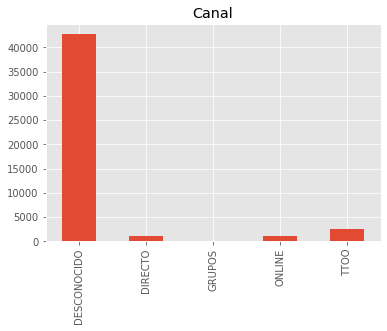

Text(0.5, 1.0, 'Canal')

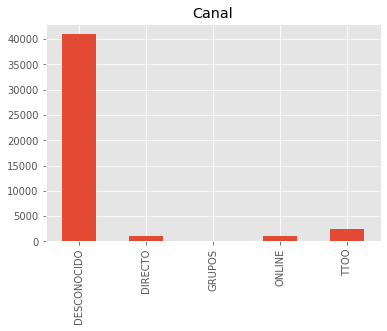

Text(0.5, 1.0, 'Canal')

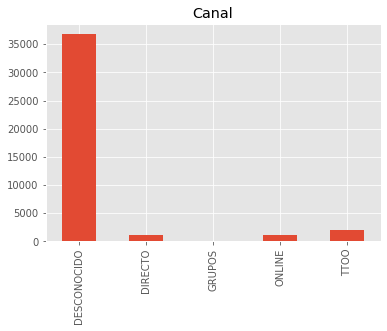

Text(0.5, 1.0, 'Canal')

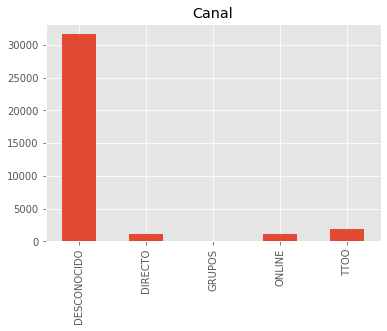

In [27]:
plt.title("Canal")
plt.show(df100['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df50['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df20['id_canal'].value_counts().sort_index().plot.bar())

plt.title("Canal")
plt.show(df10['id_canal'].value_counts().sort_index().plot.bar())



In [28]:
c100 = pd.concat([df100['id_canal'].value_counts().sort_index()/len(df100)*100, 
               df100['id_canal'].value_counts().sort_index()], axis = 1)
c100.columns = ['%', 'Recompte']
c100.sort_values(by=['Recompte'], ascending = False)

c50 = pd.concat([df50['id_canal'].value_counts().sort_index()/len(df50)*100, 
               df50['id_canal'].value_counts().sort_index()], axis = 1)
c50.columns = ['%', 'Recompte']
c50.sort_values(by=['Recompte'], ascending = False)

c20 = pd.concat([df20['id_canal'].value_counts().sort_index()/len(df20)*100, 
               df20['id_canal'].value_counts().sort_index()], axis = 1)
c20.columns = ['%', 'Recompte']
c20.sort_values(by=['Recompte'], ascending = False)

c10 = pd.concat([df10['id_canal'].value_counts().sort_index()/len(df10)*100, 
               df10['id_canal'].value_counts().sort_index()], axis = 1)
c10.columns = ['%', 'Recompte']
c10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
DESCONOCIDO,89.929239,42702
TTOO,5.330216,2531
ONLINE,2.402915,1141
DIRECTO,2.266026,1076
GRUPOS,0.071603,34


,%,Recompte
DESCONOCIDO,89.833297,40955
TTOO,5.240184,2389
ONLINE,2.502742,1141
DIRECTO,2.360167,1076
GRUPOS,0.063610,29


,%,Recompte
DESCONOCIDO,89.670399,36755
TTOO,4.906194,2011
ONLINE,2.783674,1141
DIRECTO,2.625095,1076
GRUPOS,0.014638,6


,%,Recompte
DESCONOCIDO,88.773733,31607
TTOO,5.137063,1829
ONLINE,3.075497,1095
DIRECTO,3.002472,1069
GRUPOS,0.011235,4



#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

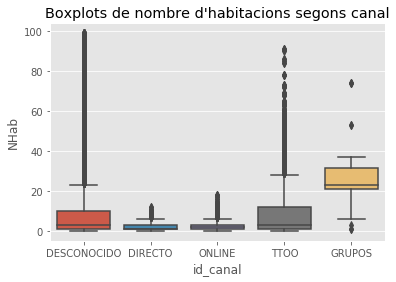

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

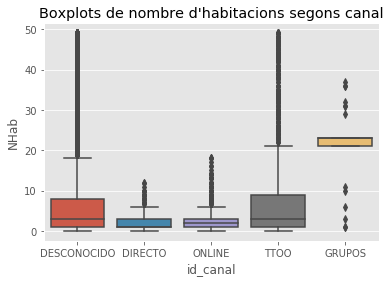

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

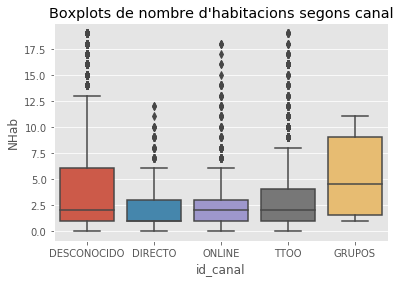

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons canal")

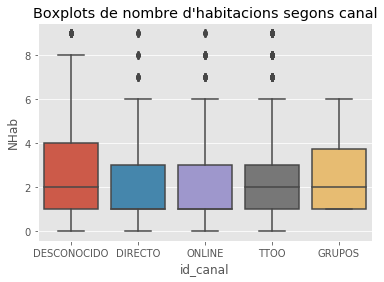

In [29]:
plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons canal")
plt.show(sns.boxplot(x="id_canal", y="NHab", data=df10))

### País client

#### Anàlisi univariat

Text(0.5, 1.0, "País de l'agència client")

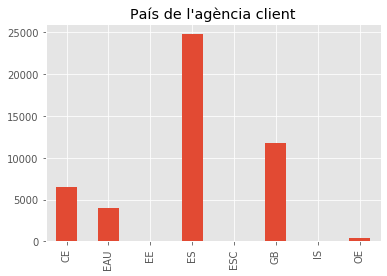

Text(0.5, 1.0, "País de l'agència client")

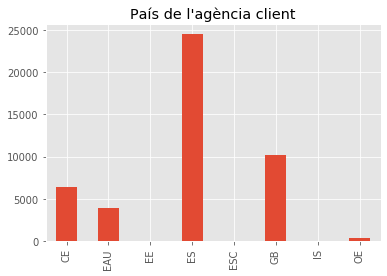

Text(0.5, 1.0, "País de l'agència client")

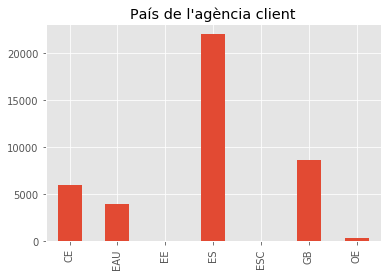

Text(0.5, 1.0, "País de l'agència client")

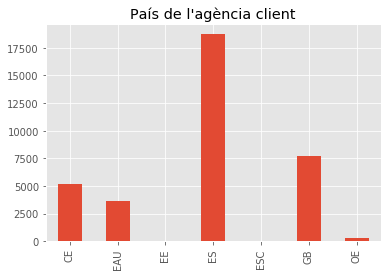

In [30]:
plt.title("País de l'agència client")
plt.show(df100['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df50['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df20['idpais_cliente'].value_counts().sort_index().plot.bar())

plt.title("País de l'agència client")
plt.show(df10['idpais_cliente'].value_counts().sort_index().plot.bar())



In [31]:
pc100 = pd.concat([df100['idpais_cliente'].value_counts().sort_index()/len(df100)*100, 
                df100['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc100.columns = ['%', 'Recompte']
pc100.sort_values(by=['Recompte'], ascending = False)

pc50 = pd.concat([df50['idpais_cliente'].value_counts().sort_index()/len(df50)*100, 
                df50['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc50.columns = ['%', 'Recompte']
pc50.sort_values(by=['Recompte'], ascending = False)

pc20 = pd.concat([df20['idpais_cliente'].value_counts().sort_index()/len(df20)*100, 
                df20['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc20.columns = ['%', 'Recompte']
pc20.sort_values(by=['Recompte'], ascending = False)

pc10 = pd.concat([df10['idpais_cliente'].value_counts().sort_index()/len(df10)*100, 
                df10['idpais_cliente'].value_counts().sort_index()], axis = 1)
pc10.columns = ['%', 'Recompte']
pc10.sort_values(by=['Recompte'], ascending = False)

,%,Recompte
ES,52.202847,24788
GB,24.797827,11775
CE,13.686716,6499
EAU,8.362817,3971
OE,0.745514,354
EE,0.134782,64
ESC,0.048437,23
IS,0.021060,10


,%,Recompte
ES,53.663084,24465
GB,22.491775,10254
CE,14.145646,6449
EAU,8.710243,3971
OE,0.776486,354
EE,0.140382,64
ESC,0.050450,23
IS,0.021935,10


,%,Recompte
ES,53.636341,21985
GB,21.134939,8663
CE,14.606358,5987
EAU,9.624533,3945
OE,0.841689,345
EE,0.143941,59
ESC,0.012198,5


,%,Recompte
ES,52.578362,18720
GB,21.618357,7697
CE,14.464667,5150
EAU,10.274127,3658
OE,0.884732,315
EE,0.165712,59
ESC,0.014043,5


#### Anàlisi bivariat

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

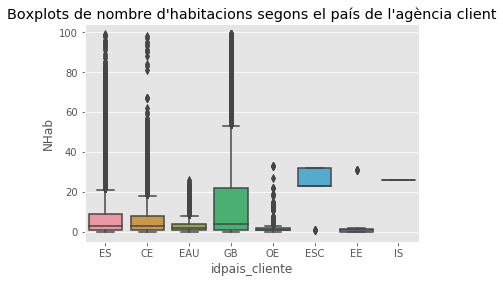

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

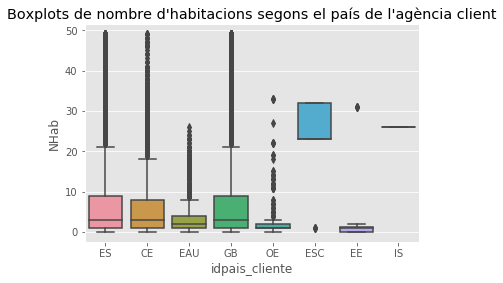

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

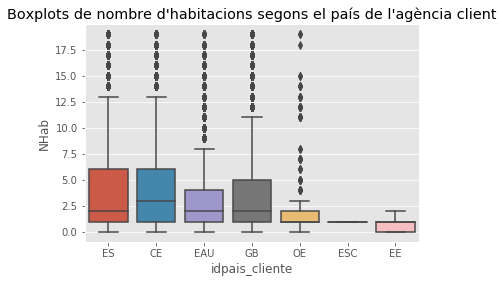

Text(0.5, 1.0, "Boxplots de nombre d'habitacions segons el país de l'agència client")

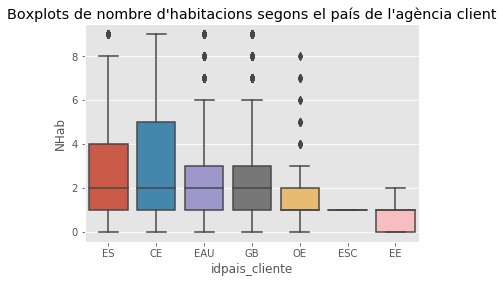

In [32]:
plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df100))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df50))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df20))

plt.title("Boxplots de nombre d'habitacions segons el país de l'agència client")
plt.show(sns.boxplot(x="idpais_cliente", y="NHab", data=df10))

In [33]:
dfextNH = df1[df1['NHab']>46]
dfextP = df1[df1['PreuHab']>272]
dfextNH.to_csv(mainpath + 'dfextNH.csv', header = True, index = None)
dfextP.to_csv(mainpath + 'dfextP.csv', header = True, index = None)
dfcsv = df1.to_csv(mainpath + 'dfFE.csv', header = True, index = None)